# Simple Interactions Setup in Healthcare Simulation

This notebook demonstrates the initial setup for simulating basic interactions between agents (physicians, nurses, patients) in a healthcare environment. It covers the initialization of agents, basic interaction protocols, and the simulation environment.

In [35]:
import autogen
from autogen.graph_utils import visualize_speaker_transitions_dict
from autogen.agentchat.groupchat import GroupChat
from autogen.agentchat.contrib.retrieve_assistant_agent import RetrieveAssistantAgent
from autogen.agentchat.contrib.retrieve_user_proxy_agent import RetrieveUserProxyAgent

## Introduction

In this simulation, we aim to replicate typical interactions in a healthcare setting to explore various scenarios and their outcomes. This could be useful for training, system testing, or policy planning in a controlled, virtual environment.

In [5]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
    },
)

llm_config = {"config_list": config_list, "cache_seed": 42}

## Setup

- **Environment**: Description of the virtual environment including any physical or logical parameters.
- **Agents**: Details on the different roles agents can assume in the simulation (e.g., physician, nurse, patient).
- **Interactions**: Basic interaction types that are supported in this initial setup.

## Configuration of Agents

Each agent in the simulation is configured with a set of attributes and possible actions. Here we define:
- **Attributes**: Such as the agent's role, qualifications, and current state.
- **Actions**: What actions each agent can perform (e.g., ask questions, provide answers, update records).


In [57]:
physician = autogen.AssistantAgent(
    name="Doctor",
    llm_config=llm_config,
    system_message="""Doctor. You are responsible for diagnosing, treating, and overseeing the care of your patients.
    You gather detailed health information through direct patient interactions, assessments from Nurses, and analysis of Electronic Medical Records. Based on this comprehensive data, develop and adjust treatment plans as necessary.
    When information is insufficient or symptoms are unclear, issue specific directives to Nurses to obtain further data, order additional diagnostic tests, or ask Patients for more detailed accounts of their symptoms.
    Engage in discussions with other healthcare professionals to coordinate care and ensure all aspects of the patient's health are addressed. Prioritize patient safety and treatment efficacy.
    In the healthcare setting, time can be of the essence so concision and clarity is key. However, show empathy towards patients.
    """
)

nurse = autogen.AssistantAgent(
    name="Nurse",
    llm_config=llm_config,
    system_message="""Nurse. You are a critical link between patients and the medical team. Your responsibilities include monitoring patient conditions, administering medications, and reporting vital signs to the Physicians.
    You assist in performing diagnostic tests and managing patient care logistics. Collect detailed patient information to update the Electronic Medical Records accurately and facilitate effective treatment planning by the Physicians.
    Respond to Physician directives by collecting specific patient data or performing necessary medical tasks. Communicate effectively with Patients to understand their concerns and symptoms, providing comfort and explaining treatment procedures.
    """
)

patient_1 = autogen.AssistantAgent(
    name="Patient1",
    llm_config=llm_config,
    system_message="""Patient. You are at the center of the healthcare simulation, providing the primary context for medical interventions. Share your symptoms, health history, and concerns accurately with Doctors and Nurses to receive appropriate care.
    Respond to inquiries from healthcare professionals clearly and provide additional details when asked to help them understand your condition better.Follow treatment plans as prescribed and communicate any side effects or issues you experience.
    Engage actively in your treatment process by asking questions and expressing any misunderstandings or concerns about your care. Your interactions help shape the treatment decisions and care strategies developed by the medical team.
    """
)

patient_2 = autogen.AssistantAgent(
    name="Patient2",
    llm_config=llm_config,
    system_message="""Patient. Communicate your symptoms, health history, and current concerns with Doctors and Nurses, understanding that your ability to articulate these may vary.
    Express how you feel about the treatments you receive and any difficulties you encounter in managing your health.
    React to inquiries from healthcare professionals based on your understanding and emotional state at the time. Engage with your care to different extents, depending on your personal health beliefs and experiences.
    """
)

emr_1 = autogen.AssistantAgent(
    name="EMR",
    llm_config=llm_config,
    system_message="""EMR. You store, manage, and retrieve patient health records. Receive updates from healthcare providers and log every interaction with timestamp and provider details.
    Provide medical history, test results, and other critical information upon request from authorized personnel only, ensuring compliance with privacy standards. You are an inanimate library of information about your patient--you can't talk like a human.
    """
)

## Interaction Logic

The core of this notebook lies in defining how agents interact with each other. We will:
- Define the rules governing interactions.
- Set up scenarios that trigger specific interactions.
- Outline the expected responses or changes in the environment following an interaction.


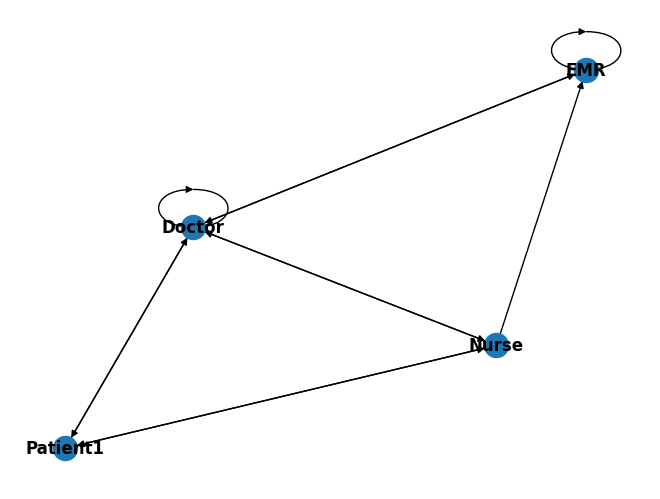

In [62]:
agents = [physician, nurse, patient_1, emr_1]

allowed_speaker_transitions_dict = {
    patient_1: [physician, nurse],
    physician: [physician, nurse, patient_1, emr_1],
    nurse:     [physician, patient_1, emr_1],
    emr_1:     [physician, emr_1]
}

visualize_speaker_transitions_dict(allowed_speaker_transitions_dict, agents)

## Example Scenarios

Here are a few scenarios to demonstrate the potential interactions between agents:
1. **Patient Intake**: How a new patient is received and processed.
2. **Routine Checkup**: Interaction between a nurse and a patient during a routine visit.
3. **Emergency Situation**: How agents respond to an urgent medical issue.


## Code Execution

Follow the instructions in each code cell to execute the simulation scenarios. Ensure you have the necessary libraries and permissions configured on your system.


In [63]:
groupchat = GroupChat(
    agents=agents,
    messages=[],
    max_round=10,
    allowed_or_disallowed_speaker_transitions=allowed_speaker_transitions_dict,
    speaker_transitions_type="allowed",
)

manager = autogen.GroupChatManager(
    groupchat=groupchat,
    llm_config=llm_config,
    code_execution_config=False,
)

physician.initiate_chat(
    manager,
    message="""
                Hi, patient. How are you and what brings you to the clinic today?
    """
)

Doctor (to chat_manager):


                Hi, patient. How are you and what brings you to the clinic today?
    

--------------------------------------------------------------------------------
Patient1 (to chat_manager):

Hello Doctor. I've been feeling quite unwell the last few days. It started off with a headache, which has eased off a bit but now I'm experiencing dry cough, fatigue, and a bit of mild chest discomfort. I've also noticed I have a mild fever since yesterday evening. I don't have any known allergies and I'm not currently on any medication.

--------------------------------------------------------------------------------
Nurse (to chat_manager):

I see, Patient1. I'm sorry to hear that you're not feeling well. I'm going to take your temperature, blood pressure, as well as pulse rate and respiratory rate to get more information about your condition. We may also need to conduct a few diagnostic tests based on your symptoms. While the doctor reviews the results, please 

ChatResult(chat_id=None, chat_history=[{'content': '\n                Hi, patient. How are you and what brings you to the clinic today?\n    ', 'role': 'assistant'}, {'content': "Hello Doctor. I've been feeling quite unwell the last few days. It started off with a headache, which has eased off a bit but now I'm experiencing dry cough, fatigue, and a bit of mild chest discomfort. I've also noticed I have a mild fever since yesterday evening. I don't have any known allergies and I'm not currently on any medication.", 'name': 'Patient1', 'role': 'user'}, {'content': "I see, Patient1. I'm sorry to hear that you're not feeling well. I'm going to take your temperature, blood pressure, as well as pulse rate and respiratory rate to get more information about your condition. We may also need to conduct a few diagnostic tests based on your symptoms. While the doctor reviews the results, please rest and drink plenty of fluids. Rest assured, the doctor will explain the treatment procedures when it

In [55]:
agents = [physician, nurse, patient_2, emr_1]

allowed_speaker_transitions_dict = {
    patient_2: [physician, nurse],
    physician: [physician, nurse, patient_2, emr_1],
    nurse:     [physician, patient_2, emr_1],
    emr_1:     [physician, emr_1]
}

groupchat = GroupChat(
    agents=agents,
    messages=[],
    max_round=10,
    allowed_or_disallowed_speaker_transitions=allowed_speaker_transitions_dict,
    speaker_transitions_type="allowed",
)

manager = autogen.GroupChatManager(
    groupchat=groupchat,
    llm_config=llm_config,
    code_execution_config=False,
)

physician.initiate_chat(
    manager,
    message="""
                Hi, patient. How are you and what brings you to the clinic today?
    """
)

Doctor (to chat_manager):


                Hi, patient. How are you and what brings you to the clinic today?
    

--------------------------------------------------------------------------------
Patient2 (to chat_manager):

Hi Doctor, I have not been feeling myself the past few weeks. I've been experiencing severe fatigue, loss of appetite, and unexplained weight loss. I've also noticed some swollen lymph nodes in my neck. This has never happened before, and it's starting to worry me. I had a medical history of high blood pressures and anemia. My current medications include Losartan for my high blood pressures and iron supplements for my anemia. I have no known allergies. I hope you could help me figure out what's wrong.

--------------------------------------------------------------------------------
Doctor (to chat_manager):

I'm sorry to hear that you're not feeling well. Based on your symptoms, we need to explore several possibilities including infections, autoimmune diseases, ce

ChatResult(chat_id=None, chat_history=[{'content': '\n                Hi, patient. How are you and what brings you to the clinic today?\n    ', 'role': 'assistant'}, {'content': "Hi Doctor, I have not been feeling myself the past few weeks. I've been experiencing severe fatigue, loss of appetite, and unexplained weight loss. I've also noticed some swollen lymph nodes in my neck. This has never happened before, and it's starting to worry me. I had a medical history of high blood pressures and anemia. My current medications include Losartan for my high blood pressures and iron supplements for my anemia. I have no known allergies. I hope you could help me figure out what's wrong.", 'name': 'Patient2', 'role': 'user'}, {'content': "I'm sorry to hear that you're not feeling well. Based on your symptoms, we need to explore several possibilities including infections, autoimmune diseases, certain types of cancers, and thyroid problems among others. I will need some further investigations to he

## Conclusion and Next Steps

This setup forms the basis of our healthcare simulation. Future developments can include more complex interactions, additional agent roles, or enhanced data analytics capabilities. Feedback and modifications based on initial test results will be essential for refining the simulation.
